<a href="https://colab.research.google.com/github/AD-2007-C/Median_House_Value-/blob/main/Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
from sklearn.datasets import load_iris, load_digits
import pandas as pd

iris = load_iris(as_frame=True)
df = iris.frame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [114]:
df.median()

,0
sepal length (cm),5.80
sepal width (cm),3.00
petal length (cm),4.35
petal width (cm),1.30
target,1.00


In [115]:
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing(as_frame=True).frame

# The DataFrame will include
# 'median_house_value' along with all other features.

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [116]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

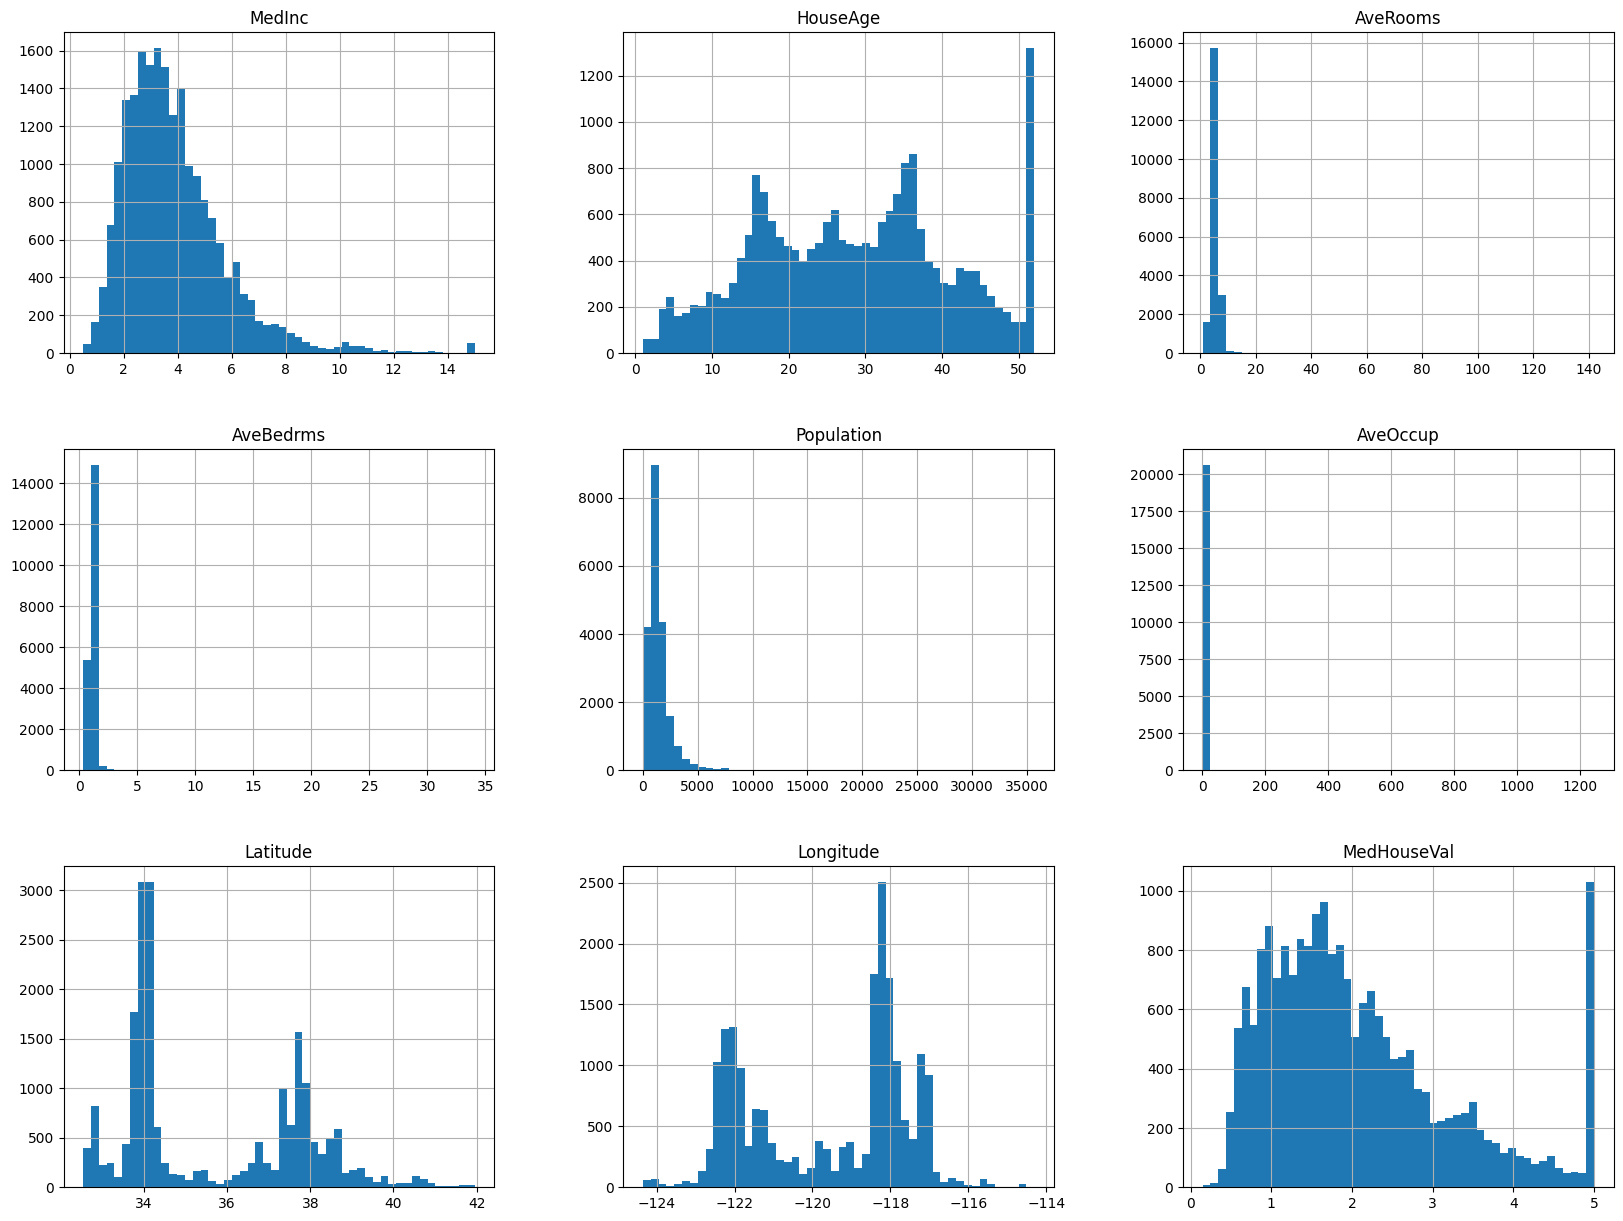

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [118]:
from sklearn.model_selection import train_test_split

train_set, test_set= train_test_split(df, test_size=0.2, random_state=42)

Data Cleaning

In [126]:
from sklearn.impute import SimpleImputer
null_values= df.isnull().sum()
print(null_values)
target=df['MedHouseVal'].copy()
X_train= df.drop('MedHouseVal', axis=1)

num_values= X_train.select_dtypes(include =["int64", "float64"])
cat_values= df.select_dtypes(include =["object", "category"])

print(num_values.columns.tolist())
print(cat_values.columns.tolist())




MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[]


PIPELINES

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



num_values= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),

    ('scaler', StandardScaler()),
])
housing_num_new= num_values.fit_transform(X_train)

In [121]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [128]:
from sklearn.compose import ColumnTransformer
num_attribs= list(X_train)


full_pipeline= ColumnTransformer([
    ("num", num_values, num_attribs),


])

# Drop the target column before transforming
full_new= full_pipeline.fit_transform(X_train)


Now we use the actual model now that the preprocessing is done

In [129]:
from sklearn.linear_model import LinearRegression



lin_reg= LinearRegression()
lin_reg.fit(full_new, target)

LinearRegression()

In [130]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = lin_reg.predict(full_new)
lin_mse= mean_squared_error(target, housing_predictions)
lin_rmse=np.sqrt(lin_mse)

print(lin_rmse)

0.7241001216576387


In [131]:
from sklearn.tree import DecisionTreeRegressor

tree_reg= DecisionTreeRegressor()
tree_reg.fit(full_new, target)
tree_prediction= tree_reg.predict(full_new)
tree_mse= mean_squared_error(target, tree_prediction)
tree_rmse=np.sqrt(tree_mse)

print(tree_rmse)



3.09111650936669e-16


In [132]:
from sklearn.model_selection import cross_val_score

scores_1= cross_val_score(tree_reg, full_new, target, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores= np.sqrt(-scores_1)
print(tree_rmse_scores)

[1.11083899 0.93975831 0.88059304 0.71543808 0.89277185 0.92768865
 0.76685444 1.02976583 1.00588751 0.74119122]


In [ ]:
scores_1= cross_val_score(lin_reg, full_new, target, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores= np.sqrt(-scores_1)
print(tree_rmse_scores)

In [133]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(full_new, target)
rf_prediction= rf.predict(full_new)
rf_mse= mean_squared_error(target, rf_prediction)
rf_rmse=np.sqrt(rf_mse)
print(rf_rmse)



0.18451163639925783


In [134]:
scores_2= cross_val_score(rf, full_new, target, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores=np.sqrt(-scores_2)
print(rf_rmse_scores)

[0.82145624 0.59940419 0.65515861 0.48028392 0.625871   0.58919603
 0.51560556 0.74640678 0.79805088 0.48840347]


NOW we finetune the model

In [135]:
from sklearn.model_selection import GridSearchCV

params_grid=[
    {'n_estimators':[3,10,30],
     'max_features':[2,4,6,8]},
    {'bootstrap':[False],
     'n_estimators':[2,8,13],
     'max_features':[2,3,5]}
]
grid_search= GridSearchCV(rf, params_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(full_new, target)

grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

Finally, we use it on a test set

In [136]:
final_model= grid_search.best_estimator_

X_test= test_set.drop("MedHouseVal", axis=1)

Y_test= test_set["MedHouseVal"].copy()

X_test_new= full_pipeline.transform(X_test)

final_prediction= final_model.predict(X_test_new)
final_mse= mean_squared_error(Y_test, final_prediction)
final_rmse= np.sqrt(final_mse)
print(final_rmse)



0.19551709874731524
